In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# simulator分析

In [1]:
import numpy as np
import pandas as pd
import datetime
import logging
logging.disable(30)

from simulator import AIRVIEW
from simulator import load_av_ue_info

# from model.DDPG import DDPGAgent
from DDPG import DDPGAgent

if __name__ == '__main__':
    RBG_NUM = 17
    FEATURE_NUM = 59
    TTI_SUM = 1000
    RANDOM_SEED = 7
    POSSION_AVG = 5 / 1000
    EPOCH = 100

    pf_env = AIRVIEW(10000, 1)
    rl_env = AIRVIEW(10000, 1)

    av_ues_info = load_av_ue_info()

    ddpg_agent = DDPGAgent(
        user_num=None,
        feature_num=59,
        rbg_num=17,
        replayer_capacity=10000,
        sample_frac=0.4
    )

    for epoch in range(1):
        print('Epoch={}'.format(epoch))
        episode_reward = 0
        INITIAL_USER_NUM = np.random.randint(2, 18, 10)[0]
        # av_ues_idx = list(range(0, INITIAL_USER_NUM))
        epoch_add = int(epoch / 1000)
        av_ues_idx = list(range(epoch_add, epoch_add + INITIAL_USER_NUM))

        pf_state = pf_env.reset(av_ues_info, av_ues_idx)
        rl_state = rl_env.reset(av_ues_info, av_ues_idx)

        tti = 0
        while (tti < TTI_SUM):
            possion_add_user = np.random.poisson(POSSION_AVG, 1)[0]

            ''' RL Allocation '''
            if rl_env.bs.newtx_rbg_ue == [None for _ in range(RBG_NUM)]:
                rl_next_state, rl_reward, rl_done, rl_info = rl_env.step(None, possion_add_user, epoch_add)
            else:
                action = ddpg_agent.decide(rl_state)
                rl_next_state, rl_reward, rl_done, rl_info = rl_env.step(action['action'], possion_add_user, epoch)
                episode_reward += rl_reward
                # print('TTI={},User={},Action={},Reward={},Episode reward={}'.format(tti, rl_env.bs.to_newtx_ues_idx, action['action'], rl_reward, episode_reward))
                ddpg_agent.learn(rl_state, action['softmax_score'], rl_reward, rl_next_state, done=False, store=True)

                rl_state = rl_next_state

            tti += 1

Epoch=0
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
13
4
4
11
4
4
11
4
4
11
4
4
11
4
4
11
4
4
8
4
4
8
3
5
8
3
5
8
3
5
8
3
5
4
3
5
4
3
5
4
3
5
4
3
5
4
3
5
4
3
5
3
4
3
4
4
3
4
4
3
4
5
3
4
5
2
3
5
2
3
5
2
3
5
2
3
5
2
3
5
3
8
5
3
8
5
3
9
3
9
3
9
2
8
2
8
2
8
2
8
2
8
2
9
2
9
2
9
2
9
2
9
2
11
2
11
2
11
2
11
2
11
3
11
3
11
3
11
3
11
3
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
11
3
12
3
12
3
12
3
12
3
12
2
11
2
11
2
11
2
11
2
11
3
11
3
11
3
11
3
11
3
11
3
12
3
12
3
12
3
12
3
12
2
12
2
12
2
12
2
12
2
12
3
13
3
13
3
13
3
13
3
13
4
14
4
14
4
14
4
14
4
14
4
14
4
14
4
14
4
14
4
14
4
13
4
13
4
13
4
13
4
13
4
12
4
12
4
12
4
12
4
12
4
13
4
13
4
13
4
13
4
13
4
13
4
13
4
13
4
13
4
13
4
13
4
13
4
13
4
13
4
13


KeyboardInterrupt: 

In [2]:
memory = ddpg_agent.replayer.memory
memory.dropna(inplace=True)
sample = memory.sample(frac=0.8)
sample = sample[sample['state_tx_user']==sample['next_state_tx_user']]
sample

,state_user_info,state_rbg_avl,state_tx_user,action,reward,next_state_user_info,next_state_rbg_avl,next_state_tx_user,done
445,"[[-128.81, 5420535.0, 602.0855855855856, 1.0, ...","[None, None, None, None, None, None, 21, None,...","[0, 1, 11]","[[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0,...",1.02379,"[[-128.81, 5419839.0, 603.2112359550562, 1.0, ...","[None, None, None, None, None, None, 21, None,...","[0, 1, 11]",False
150,"[[-128.81, 5667397.0, 167.8724832214765, 7.0, ...","[None, None, None, None, None, None, None, Non...","[0, 1, 8, 11, 16]","[[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,...",0.96722,"[[-128.81, 5666980.0, 168.94, 7.0, 7.0, 7.0, 7...","[None, None, None, None, None, None, None, Non...","[0, 1, 8, 11, 16]",False
63,"[[-128.81, 5691447.0, 50.064516129032256, 5.0,...","[None, None, None, None, None, None, None, Non...","[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13]","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",0.844235,"[[-128.81, 5691395.0, 49.76190476190476, 5.0, ...","[None, None, None, None, None, None, None, Non...","[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13]",False
119,"[[-128.81, 5678608.0, 112.21186440677967, 7.0,...","[None, None, None, None, None, None, None, Non...","[0, 1, 2, 5, 8, 11]","[[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0,...",1.04024,"[[-128.81, 5678280.0, 115.52100840336135, 7.0,...","[None, None, None, None, None, None, None, Non...","[0, 1, 2, 5, 8, 11]",False
367,"[[-128.81, 5517613.0, 443.7841530054645, 9.0, ...","[None, None, None, None, None, None, None, Non...","[0, 1, 11]","[[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0,...",1.0222,"[[-128.81, 5515849.0, 447.38147138964575, 9.0,...","[None, None, None, None, None, None, None, Non...","[0, 1, 11]",False
...,...,...,...,...,...,...,...,...,...
632,"[[-128.81, 5198549.0, 767.4928684627575, 7.0, ...","[None, None, None, None, None, None, None, Non...","[0, 1, 11, 23]","[[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0,...",1.05359,"[[-128.81, 5196709.0, 768.1028481012659, 7.0, ...","[None, None, None, None, None, None, None, Non...","[0, 1, 11, 23]",False
271,"[[-128.81, 5615851.0, 279.1666666666667, 3.0, ...","[None, None, None, None, None, None, None, Non...","[0, 1, 11, 16]","[[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0,...",1.01708,"[[-128.81, 5615401.0, 280.15867158671585, 3.0,...","[None, None, None, None, None, None, None, Non...","[0, 1, 11, 16]",False
371,"[[-128.81, 5510557.0, 464.4945945945946, 9.0, ...","[None, None, None, None, None, None, None, Non...","[0, 1, 11]","[[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0,...",1.02755,"[[-128.81, 5508793.0, 467.99730458221023, 9.0,...","[None, None, None, None, None, None, None, Non...","[0, 1, 11]",False
580,"[[-128.81, 5282421.0, 698.7305699481865, 5.0, ...","[None, None, None, None, None, None, None, Non...","[0, 1, 11, 23]","[[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0,...",0.966276,"[[-128.81, 5280581.0, 699.1637931034483, 5.0, ...","[None, None, None, None, None, None, None, Non...","[0, 1, 11, 23]",False


In [5]:
for index in memory.index:
    print(memory['state_user_info'][index][:, 55], 'tx user', memory['state_tx_user'][index])

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] tx user [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] tx user [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] tx user [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] tx user [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] tx user [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] tx user [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] tx user [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] tx user [0, 1, 2, 3, 4, 5, 6, 7

In [25]:
sample_shape_list = []

for index in sample.index:
    sample_shape_list.append(len(memory.loc[index]['state_tx_user']))
sample_shape_list = list(set(sample_shape_list) & set(sample_shape_list))

print(sample_shape_list)
sub_sample_list = []
for i in range(len(sample_shape_list)):
    sub_sample_list.append([])
    for index in sample.index:
        if len(memory.loc[index]['state_tx_user']) == sample_shape_list[i]:
            sub_sample_list[i].append(index)

all_sample = []
for sub_sample in sub_sample_list:
    print(sub_sample)
    all_sample.append((np.stack(memory.loc[sub_sample, field], axis=0) for field in memory.columns))
all_sample

[2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 16, 17]
[605, 731, 682, 757, 741, 754, 753, 679, 607, 585, 735, 540, 345, 537, 541, 604, 751, 582, 730, 733, 749, 662, 603, 663, 732, 538, 672, 674, 738, 602, 608, 744, 752, 586, 686, 671, 758, 736, 734, 560, 756, 587, 666, 747, 583, 343, 466, 750, 557, 755, 539, 610, 746, 740, 601, 606, 739, 611]
[374, 482, 484, 635, 646, 831, 458, 660, 338, 223, 562, 879, 493, 448, 245, 348, 273, 625, 694, 815, 418, 498, 188, 706, 621, 526, 703, 420, 568, 637, 503, 969, 260, 573, 875, 302, 725, 485, 264, 459, 196, 590, 456, 721, 313, 285, 360, 697, 216, 629, 530, 234, 650, 225, 372, 501, 689, 425, 563, 257, 202, 388, 804, 634, 403, 652, 397, 359, 354, 207, 710, 381, 717, 499, 249, 528, 224, 470, 379, 369, 328, 263, 628, 497, 622, 633, 860, 282, 339, 269, 241, 371, 376, 575, 474, 494, 206, 195, 386, 329, 522, 280, 451, 574, 373, 265, 645, 208, 684, 222, 193, 284, 618, 262, 228, 389, 970, 579, 212, 286, 237, 874, 287, 247, 235, 423, 638, 404, 422, 500, 275, 382

[<generator object <genexpr> at 0x000002D1477220A0>,
 <generator object <genexpr> at 0x000002D1476717D8>,
 <generator object <genexpr> at 0x000002D147671830>,
 <generator object <genexpr> at 0x000002D147671888>,
 <generator object <genexpr> at 0x000002D1476718E0>,
 <generator object <genexpr> at 0x000002D147671938>,
 <generator object <genexpr> at 0x000002D147671990>,
 <generator object <genexpr> at 0x000002D1476719E8>,
 <generator object <genexpr> at 0x000002D147671A40>,
 <generator object <genexpr> at 0x000002D147671A98>,
 <generator object <genexpr> at 0x000002D147671AF0>,
 <generator object <genexpr> at 0x000002D147671B48>,
 <generator object <genexpr> at 0x000002D147671BA0>,
 <generator object <genexpr> at 0x000002D147671BF8>]

In [54]:
for sub_sample in sub_sample_list:
    batch_sample = (np.stack(memory.loc[sub_sample, field], axis=0) for field in memory.columns)
    state_user_info, state_rbg_avl, state_tx_user,action_, reward_, next_state_user_info, next_state_rbg_avl, next_state_tx_user, done_ = batch_sample
    print(state_user_info.shape)

(6, 2, 21)
(284, 3, 21)
(10, 4, 21)
(2, 5, 21)
(24, 6, 21)
(31, 7, 21)
(7, 8, 21)
(6, 10, 21)
(1, 11, 21)


In [27]:
state_user_info.shape

(1, 11, 21)

In [52]:
x = (np.stack(memory.loc[[491, 489, 495, 490, 493, 499], field], axis=0) for field in memory.columns)
x

<generator object <genexpr> at 0x0000027CE6F81E08>

In [53]:
state_user_info, state_rbg_avl, state_tx_user,action_, reward_, next_state_user_info, next_state_rbg_avl, next_state_tx_user, done_ = x
state_user_info.shape

(6, 2, 21)

In [6]:
all_feature_shape = []
sample_feature_shape = []
for item in memory.index:
    shape = len(memory['state'][item]['tx_user'])
    all_feature_shape.append(shape)
for item in sample.index:
    shape = len(sample['state'][item]['tx_user'])
    sample_feature_shape.append(shape)

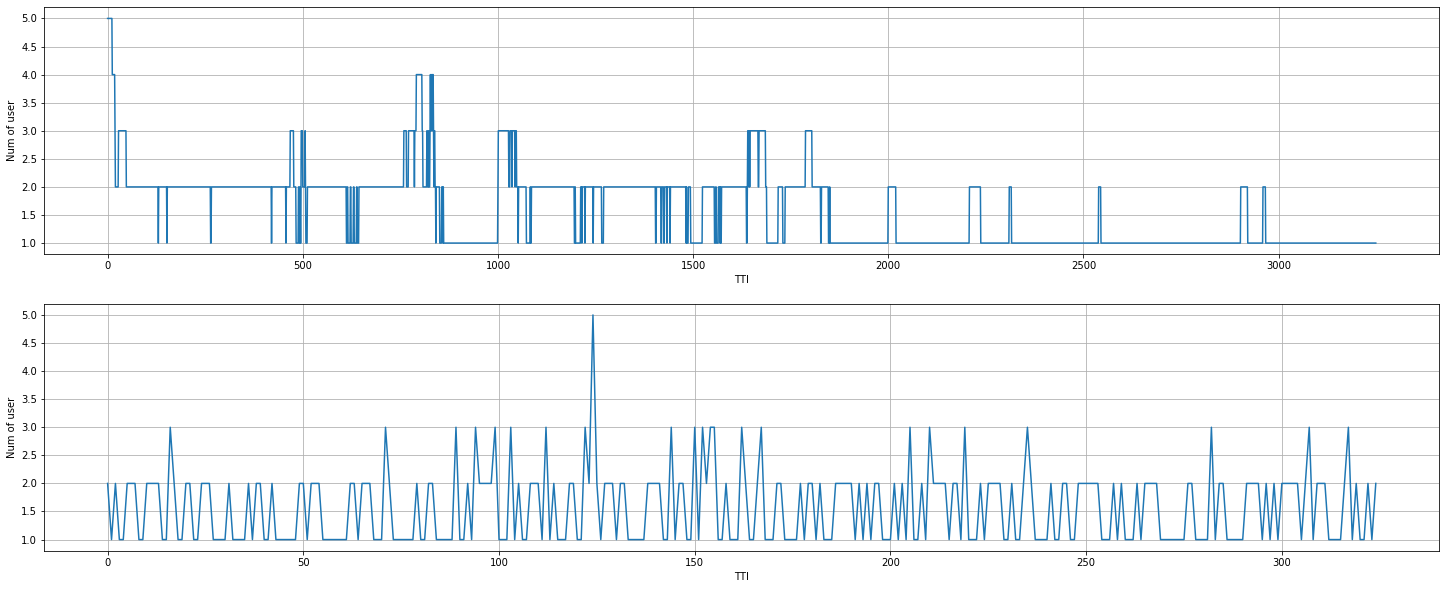

In [9]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 1, 1)
plt.plot(all_feature_shape)
plt.xlabel('TTI')
plt.ylabel('Num of user')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(sample_feature_shape)
plt.xlabel('TTI')
plt.ylabel('Num of user')
plt.grid(True)

plt.show()

# 实验数据分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
record = pd.read_csv('log/20200219-11-00/record.txt', header=None, sep='[=:, \]]')
record = record[[13, 15, 21, 23]]
record = record.loc[0:99].reset_index()
print(record[13][record[13]>record[21]].shape)
print(record[15][record[15]>record[23]].shape)

(5,)
(43,)


D:\anaconda3\envs\tf20-cpu\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


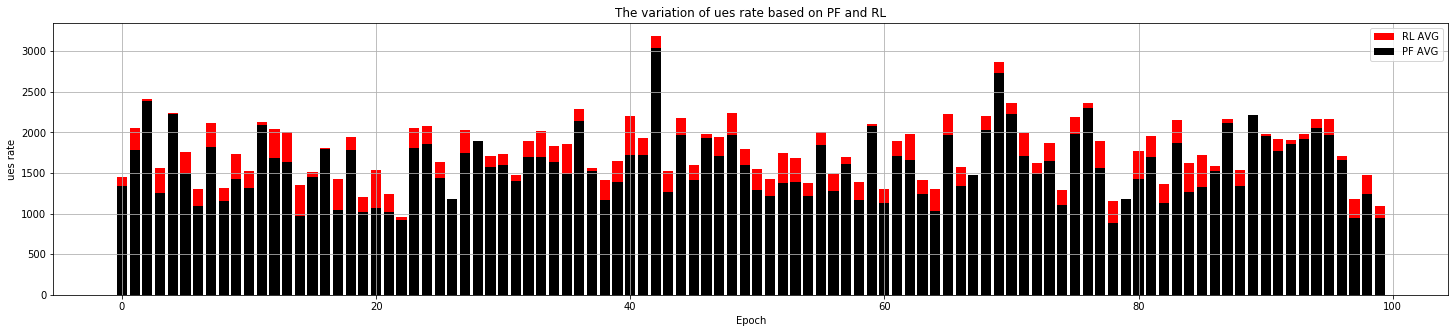

In [51]:
plt.figure(figsize=(25, 5))

plt.title('The variation of ues rate based on PF and RL')
plt.xlabel('Epoch')
plt.ylabel('ues rate')
plt.grid(True)
plt.bar(range(100), record[21], label='RL AVG', color='red')
plt.bar(range(100), record[13], label='PF AVG', color='black')
plt.legend()

plt.show()

# 数据分析

In [1]:
from simulator import AIRVIEW
from simulator import load_av_ue_info
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

env = AIRVIEW()
av_ues_info = load_av_ue_info()

INITIAL_USER_NUM = np.random.randint(2, 18, 10)[0]
print(INITIAL_USER_NUM)
av_ues_idx = list(range(0, INITIAL_USER_NUM))

state = env.reset(av_ues_info, av_ues_idx)

9


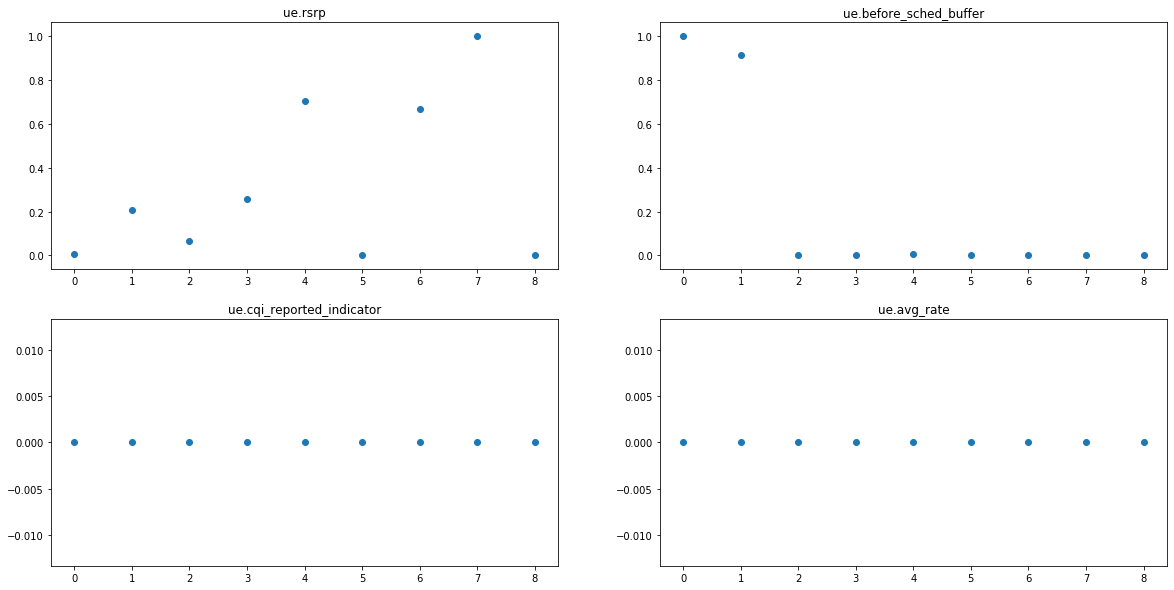

In [7]:
plt.figure(figsize=(20, 10))

title = ['ue.rsrp','ue.before_sched_buffer','ue.cqi_reported_indicator','ue.avg_rate']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title(title[i])
    plt.scatter(range(state['user_info'].shape[0]),state['user_info'][:,i])
    
plt.show()

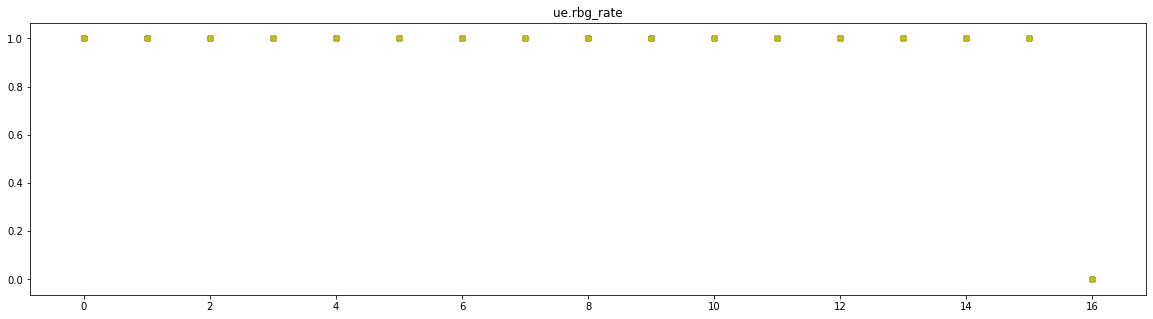

In [4]:
plt.figure(figsize=(20, 5))
plt.title('ue.rbg_rate')
for i in range(state['user_info'].shape[0]):
    plt.scatter(range(21-4), state['user_info'][i, 4:21])
plt.show()

In [ ]:
x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', name='DownSampling-1')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)